In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [2]:
# Load the dataset
df = pd.read_csv('IRIS.csv')

# Data Inspection

In [3]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
61,5.9,3.0,4.2,1.5,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
duplicate_rows = df.duplicated().sum()
print("Total Duplicate Record:", duplicate_rows)

Total Duplicate Record: 3


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Remove dublication values
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis

#### Univariate Analysis 

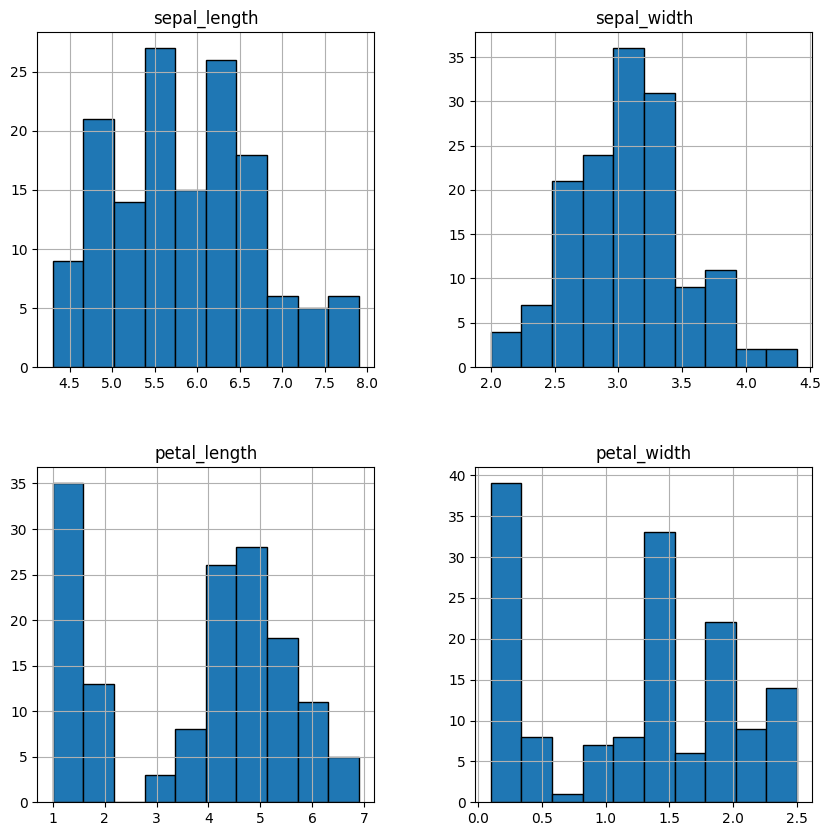

In [9]:
df.hist(edgecolor='black',figsize=(10,10))
plt.show()

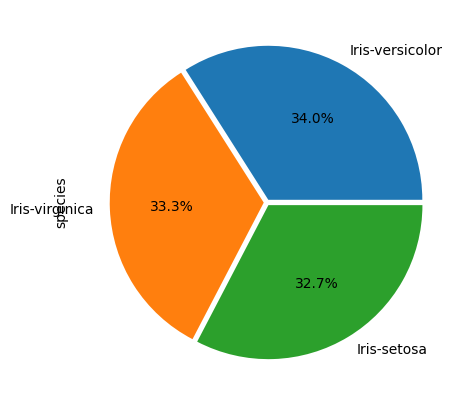

In [10]:
df['species'].value_counts().plot.pie(explode=[0.02,0.02,0.02],autopct='%1.1f%%',figsize=(5,5))
plt.show()

#### Bivariate Analysis

<Figure size 800x600 with 0 Axes>

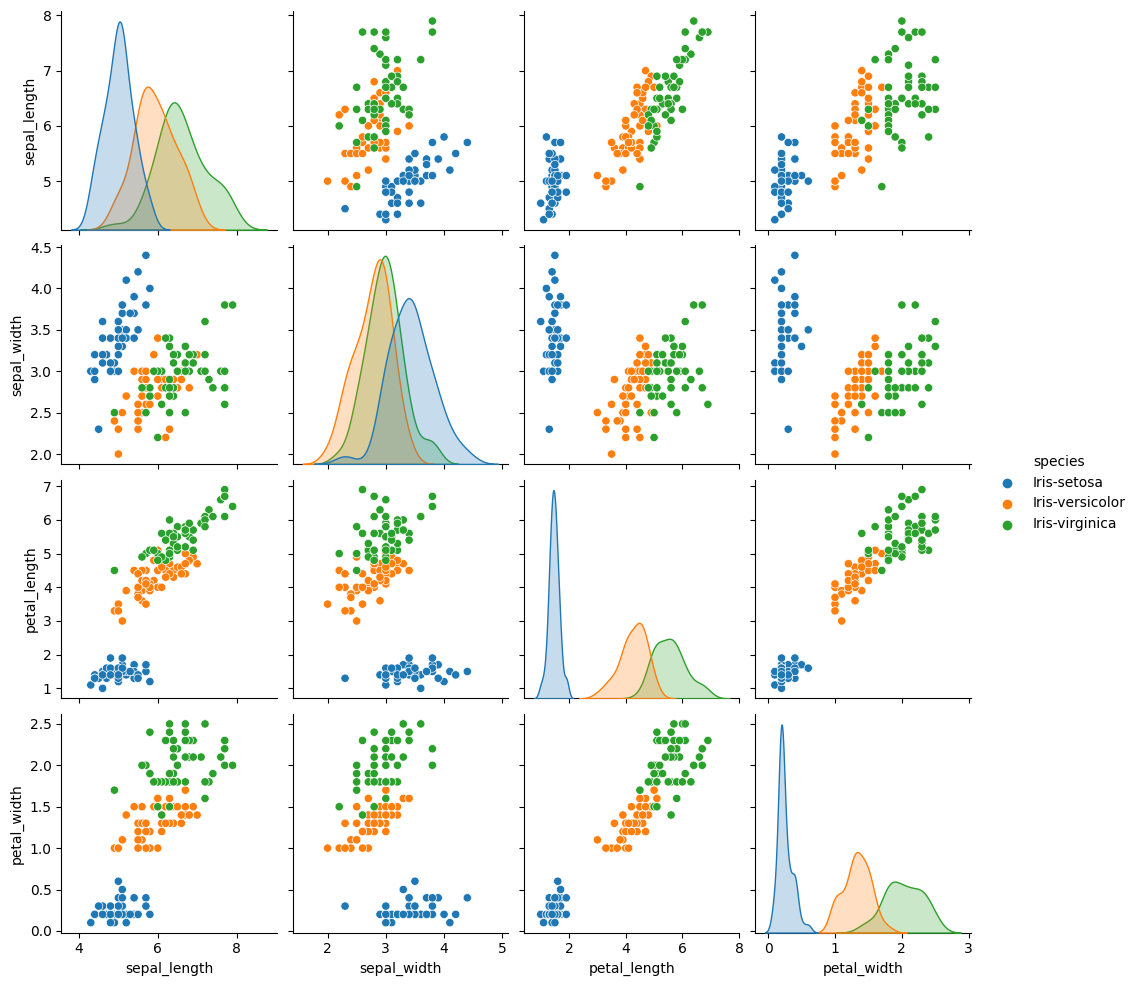

In [11]:
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue="species")
plt.show()

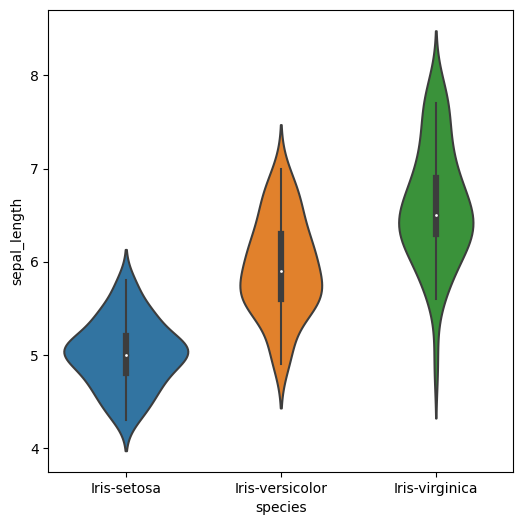

In [12]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df ,x="species", y="sepal_length")
plt.show()

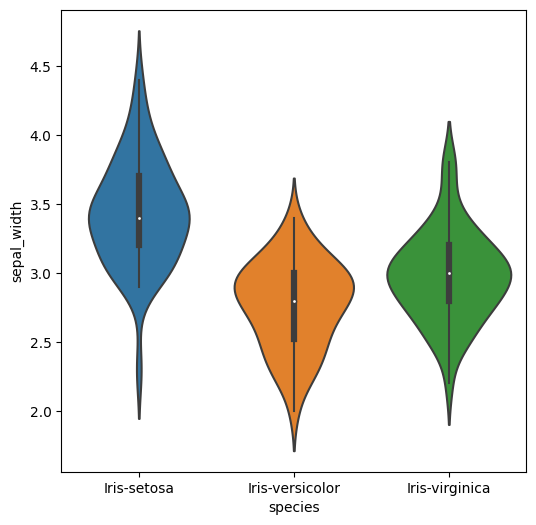

In [13]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df ,x="species", y="sepal_width")
plt.show()

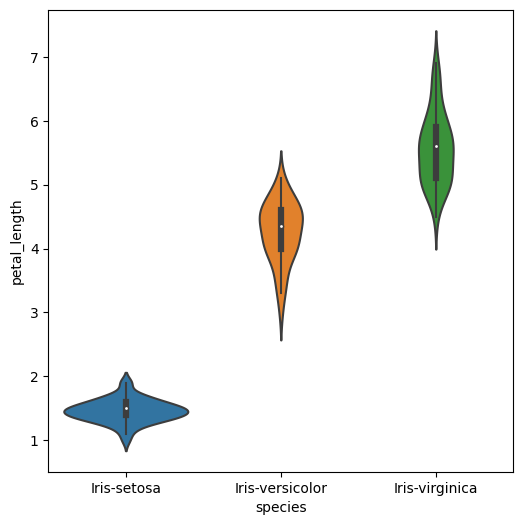

In [14]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df ,x="species", y="petal_length")
plt.show()

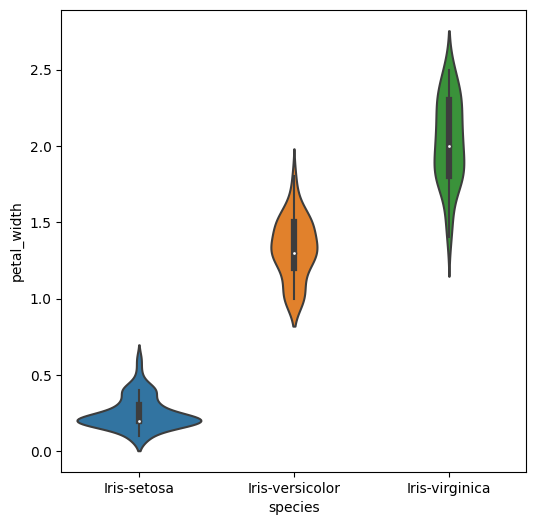

In [15]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df ,x="species", y="petal_width")
plt.show()

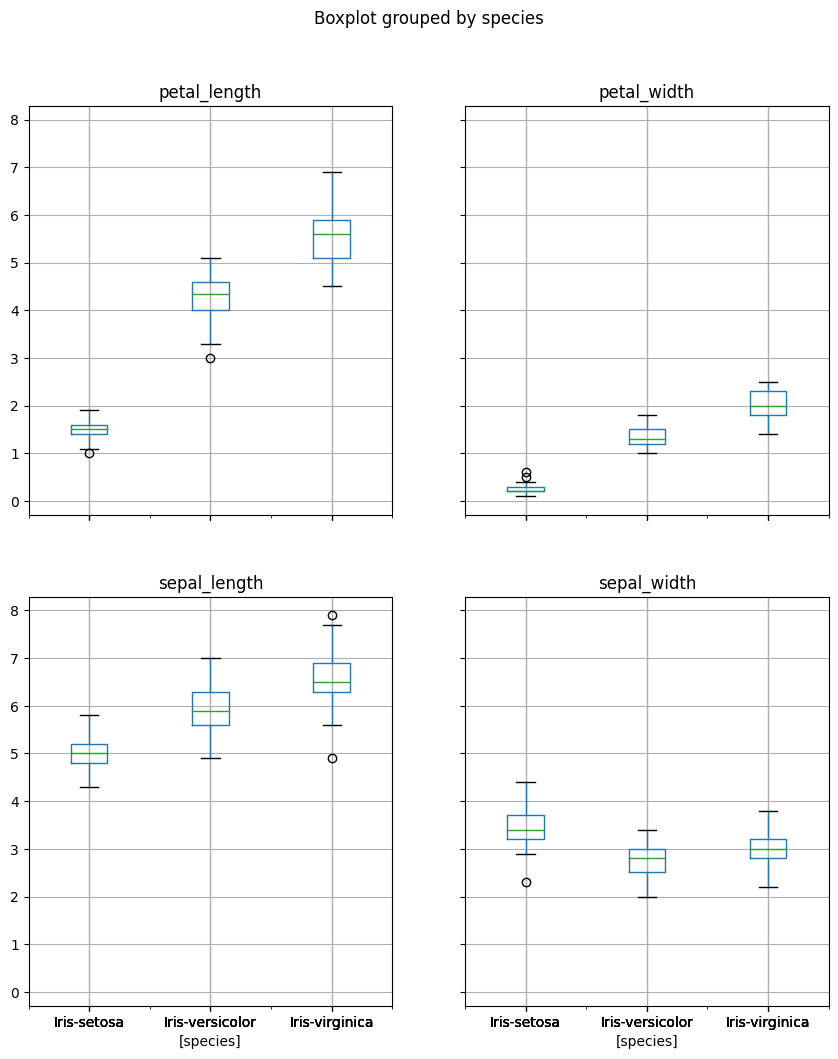

In [16]:
df.boxplot(by="species", figsize=(10,12))
plt.show()

<AxesSubplot:>

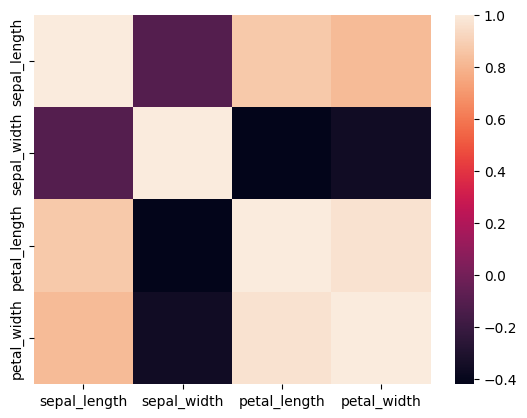

In [17]:
sns.heatmap(df.corr())

# Model Building

In [18]:
x = df.drop('species', axis=1)
y = df.species

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(117, 4)
(117,)
(30, 4)
(30,)


#### LogisticRegression

In [20]:
logreg = LogisticRegression( max_iter=200)
logreg.fit(x, y)
y_pred=logreg.predict(x_test)
score=accuracy_score(y_test, y_pred)
print('The accuracy of the Logistic Regression is {:.2f} '.format(score))

The accuracy of the Logistic Regression is 0.97 


#### Support Vector Classifier

In [21]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)
score=accuracy_score(y_test, y_pred)
print('The accuracy of the Support Vector Classifier is {:.2f} '.format(score))

The accuracy of the Support Vector Classifier is 0.90 


#### RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred=rf_model.predict(x_test)
score=accuracy_score(y_test, y_pred)
print('The accuracy of the RandomForest Classifier is {:.2f} '.format(score))

The accuracy of the RandomForest Classifier is 0.93 


#### KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
score=accuracy_score(y_test, y_pred)
print('The accuracy of the knn classifier is {:.2f} '.format(score))

The accuracy of the knn classifier is 0.97 
